In [1]:
# import libraries

# maths
import numpy as np
import pandas as pd

# visual
#from matplotlib_venn import venn2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# modelling
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.utils import resample, shuffle
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from IPython.display import Image

import xgboost as xgb


/Users/Wilson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read DataFrame

In [2]:
df_test = pd.read_csv('../csv_files/model_test_data.csv',index_col=0)

In [3]:
df_test.reset_index(drop=True)

,Date,Latitude,Longitude,year,month,day,day_of_year,week,Station,Tmax,...,Trap_T231,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
0,2008-06-11,41.954690,-87.800991,2008,6,11,163,24,1,86,...,0,0,0,0,0,0,0,0,0,0
1,2008-06-11,41.954690,-87.800991,2008,6,11,163,24,1,86,...,0,0,0,0,0,0,0,0,0,0
2,2008-06-11,41.954690,-87.800991,2008,6,11,163,24,1,86,...,0,0,0,0,0,0,0,0,0,0
3,2008-06-11,41.954690,-87.800991,2008,6,11,163,24,1,86,...,0,0,0,0,0,0,0,0,0,0
4,2008-06-11,41.954690,-87.800991,2008,6,11,163,24,1,86,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116288,2014-10-02,41.925652,-87.633590,2014,10,2,275,40,1,72,...,0,0,0,0,0,0,0,0,0,0
116289,2014-10-02,41.925652,-87.633590,2014,10,2,275,40,1,72,...,0,0,0,0,0,0,0,0,0,0
116290,2014-10-02,41.925652,-87.633590,2014,10,2,275,40,1,72,...,0,0,0,0,0,0,0,0,0,0
116291,2014-10-02,41.925652,-87.633590,2014,10,2,275,40,1,72,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train = pd.read_csv('../csv_files/model_train_data.csv',index_col=0)

In [5]:
df_train.reset_index(drop=True)

,Date,Latitude,Longitude,year,month,day,day_of_year,week,Station,Tmax,...,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903,WnvPresent,NumMosquitos
0,2007-08-21,41.944869,-87.832763,2007,8,21,233,34,1,87,...,0,0,0,0,0,0,0,0,1,11
1,2011-07-25,42.008314,-87.777921,2011,7,25,206,30,1,88,...,0,0,0,0,0,0,0,0,0,15
2,2009-07-10,41.662014,-87.724608,2009,7,10,191,28,1,82,...,0,0,0,0,0,0,0,0,0,42
3,2013-08-01,41.728495,-87.600963,2013,8,1,213,31,1,81,...,0,0,0,0,0,0,0,0,1,21
4,2013-09-12,41.923738,-87.785288,2013,9,12,255,37,1,82,...,0,0,0,0,0,0,0,0,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19905,2007-08-02,41.682587,-87.707973,2007,8,2,214,31,1,91,...,0,0,0,0,0,0,0,0,0,20
19906,2007-08-16,41.726465,-87.585413,2007,8,16,228,33,1,77,...,0,0,0,0,0,0,0,0,0,50
19907,2007-08-21,41.797616,-87.797894,2007,8,21,233,34,1,87,...,0,0,0,0,0,0,0,0,1,10
19908,2013-08-22,41.984809,-87.728492,2013,8,22,234,34,1,78,...,0,0,0,0,0,0,0,0,1,31


In [6]:
df_test.head()

,Date,Latitude,Longitude,year,month,day,day_of_year,week,Station,Tmax,...,Trap_T231,Trap_T232,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903
10506,2008-06-11,41.95469,-87.800991,2008,6,11,163,24,1,86,...,0,0,0,0,0,0,0,0,0,0
10507,2008-06-11,41.95469,-87.800991,2008,6,11,163,24,1,86,...,0,0,0,0,0,0,0,0,0,0
10508,2008-06-11,41.95469,-87.800991,2008,6,11,163,24,1,86,...,0,0,0,0,0,0,0,0,0,0
10509,2008-06-11,41.95469,-87.800991,2008,6,11,163,24,1,86,...,0,0,0,0,0,0,0,0,0,0
10510,2008-06-11,41.95469,-87.800991,2008,6,11,163,24,1,86,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_train.head()

,Date,Latitude,Longitude,year,month,day,day_of_year,week,Station,Tmax,...,Trap_T233,Trap_T234,Trap_T235,Trap_T236,Trap_T237,Trap_T238,Trap_T900,Trap_T903,WnvPresent,NumMosquitos
0,2007-08-21,41.944869,-87.832763,2007,8,21,233,34,1,87,...,0,0,0,0,0,0,0,0,1,11
1,2011-07-25,42.008314,-87.777921,2011,7,25,206,30,1,88,...,0,0,0,0,0,0,0,0,0,15
2,2009-07-10,41.662014,-87.724608,2009,7,10,191,28,1,82,...,0,0,0,0,0,0,0,0,0,42
3,2013-08-01,41.728495,-87.600963,2013,8,1,213,31,1,81,...,0,0,0,0,0,0,0,0,1,21
4,2013-09-12,41.923738,-87.785288,2013,9,12,255,37,1,82,...,0,0,0,0,0,0,0,0,1,21


In [ ]:
#Converting Date to DateTime.

df_train['Date'] = pd.to_datetime(df_train['Date']) 

df_test['Date'] = pd.to_datetime(df_test['Date'])

## Modelling (Random Forest)

### Predicting presence of WNV

In [8]:
#Selecting features and target variable

X = df_train.drop(['WnvPresent','NumMosquitos','Date'], axis=1)

y = df_train['WnvPresent']

In [9]:
#Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
#RandomForest Classifier

params = {
    'n_estimators' : [10, 50, 100, 500, 1000],
    'max_depth' : [3, 9, 15, 20],
    'min_samples_split': np.linspace(0.1, 0.5, 5),
    'min_samples_leaf' : np.linspace(0.1, 0.5, 5),
    'max_features' : [20, 50, 100, 150]
}

In [11]:
parameters = []
roc_auc = []

gridsearch = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    verbose=1,
    cv= 3,
    n_jobs=-1,
    return_train_score= True,
    scoring = 'roc_auc'
)

gridsearch.fit(X_train, y_train)

model = gridsearch.best_estimator_
cv_score = gridsearch.cv_results_
best_params = gridsearch.best_params_

# predict y
y_pred = pd.DataFrame(model.predict_proba(X_test), columns=['0','1'])

# print results
print("Best parameters:", best_params)
print("Best score:", gridsearch.best_score_)
print("AUC/ROC test:", roc_auc_score(y_test,y_pred['1']))
pd.set_option('display.max_rows', 750)
display(pd.DataFrame(cv_score, columns = cv_score.keys()), )


# append info to list
parameters.append(best_params)
roc_auc.append(roc_auc_score(y_test,y_pred['1']))

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1768 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 2418 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 4018 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 4968 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed: 24.0min finished


Best parameters: {'max_depth': 20, 'max_features': 50, 'min_samples_leaf': 0.1, 'min_samples_split': 0.2, 'n_estimators': 1000}
Best score: 0.8156699703312362
AUC/ROC test: 0.8151776589271725


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.132737,0.002423,0.019069,0.002458,3,20,0.1,0.1,10,"{'max_depth': 3, 'max_features': 20, 'min_samp...",...,0.791537,0.802941,0.800817,0.006876,256,0.799776,0.793044,0.815399,0.802740,0.009364
1,0.354558,0.002918,0.032462,0.001686,3,20,0.1,0.1,50,"{'max_depth': 3, 'max_features': 20, 'min_samp...",...,0.799898,0.806173,0.806459,0.005478,134,0.805865,0.803501,0.813996,0.807787,0.004495
2,0.625594,0.004646,0.051505,0.001372,3,20,0.1,0.1,100,"{'max_depth': 3, 'max_features': 20, 'min_samp...",...,0.806718,0.803168,0.806403,0.002522,136,0.802398,0.810158,0.811998,0.808184,0.004160
3,2.837331,0.045932,0.205687,0.000902,3,20,0.1,0.1,500,"{'max_depth': 3, 'max_features': 20, 'min_samp...",...,0.804156,0.803243,0.806264,0.003645,138,0.803146,0.807279,0.810101,0.806842,0.002856
4,5.526952,0.020906,0.398906,0.003044,3,20,0.1,0.1,1000,"{'max_depth': 3, 'max_features': 20, 'min_samp...",...,0.806125,0.804075,0.807609,0.003645,108,0.804983,0.809060,0.811620,0.808555,0.002733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.114353,0.001161,0.021014,0.002704,20,150,0.5,0.5,10,"{'max_depth': 20, 'max_features': 150, 'min_sa...",...,0.500000,0.500000,0.500000,0.000000,1201,0.500000,0.500000,0.500000,0.500000,0.000000
1996,0.308537,0.003163,0.042567,0.002736,20,150,0.5,0.5,50,"{'max_depth': 20, 'max_features': 150, 'min_sa...",...,0.500000,0.500000,0.500000,0.000000,1201,0.500000,0.500000,0.500000,0.500000,0.000000
1997,0.556112,0.002600,0.071146,0.003216,20,150,0.5,0.5,100,"{'max_depth': 20, 'max_features': 150, 'min_sa...",...,0.500000,0.500000,0.500000,0.000000,1201,0.500000,0.500000,0.500000,0.500000,0.000000
1998,2.292893,0.060502,0.198047,0.032640,20,150,0.5,0.5,500,"{'max_depth': 20, 'max_features': 150, 'min_sa...",...,0.500000,0.500000,0.500000,0.000000,1201,0.500000,0.500000,0.500000,0.500000,0.000000


In [16]:
#Confusion Matrix
grid_pred = model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, grid_pred).ravel()

#Confusion Matrix metrics

accuracy = (tp+tn)/(tp+fp+fn+tn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

print('\n')

print('Accuracy:',round(accuracy,3))
print('Sensitivity:',round(sensitivity,3))
print('Specificity:',round(specificity,3))
print('Precision:',round(precision,3))

True Negatives: 2078
False Positives: 1210
False Negatives: 554
True Positives: 2729


Accuracy: 0.732
Sensitivity: 0.831
Specificity: 0.632
Precision: 0.693


In [17]:
# Prediction against test data
features = list(X.columns)
test = df_test[features]

pred = pd.DataFrame(model.predict_proba(test), columns=['0','1']) 

In [14]:
#Top features in RandomForest
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance'])

top_feature = feature_importances.sort_values('importance', ascending=False)

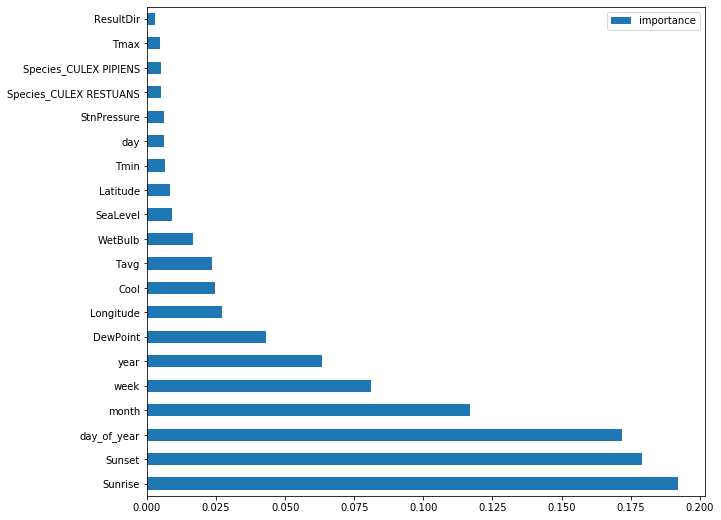

In [15]:
#Top 20 features
fig = top_feature.iloc[:20]
fig.plot(kind='barh', figsize=(10,9));


In [18]:
#Submission to Kaggle

submission = pd.DataFrame()
submission['WnvPresent'] = pred['1']
submission['Id'] = submission.index + 1
submission[['Id', 'WnvPresent']].to_csv('../csv_files/submission_with_randomforest2.csv', index = False)

### XGBoost (Basic_model)

In [19]:
#Train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=123)

In [20]:
# fit model no training data

xg_log = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [21]:
xg_log.fit(X_train,y_train)

pred_proba = xg_log.predict_proba(X_test)

preds = xg_log.predict(X_test)

In [22]:
# predict y
y_pred = pd.DataFrame(xg_log.predict_proba(X_test), columns=['0','1'])



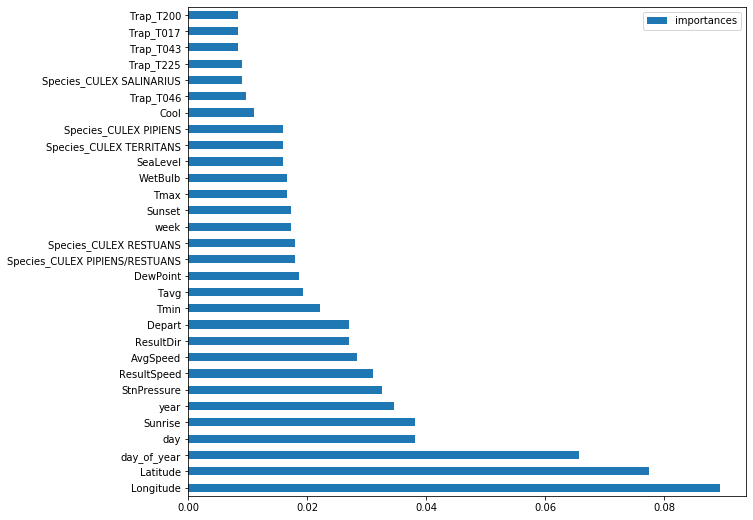

In [23]:
# visualise feature importances from the model

fi = pd.DataFrame({
    'features': X.columns,
    'importances': xg_log.feature_importances_})
fig = fi.sort_values(by='importances', ascending=False).iloc[:30]
fig.plot(kind='barh', figsize=(10,9))
plt.yticks(range(len(fig)),fig['features'])
plt.show()

In [24]:
print("Train Score:", xg_log.score(X_train, y_train))
print("Test Score:", xg_log.score(X_test, y_test))
print('\n')
print("AUC/ROC test:", roc_auc_score(y_test,y_pred['1']))

Train Score: 0.8508170795993675
Test Score: 0.8412004222590861


AUC/ROC test: 0.9130515176475276


In [25]:
#Confusion Matrix

tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

#Confusion Matrix metrics

accuracy = (tp+tn)/(tp+fp+fn+tn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

print('\n')

print('Accuracy:',round(accuracy,3))
print('Sensitivity:',round(sensitivity,3))
print('Specificity:',round(specificity,3))
print('Precision:',round(precision,3))

True Negatives: 2537
False Positives: 757
False Negatives: 296
True Positives: 3041


Accuracy: 0.841
Sensitivity: 0.911
Specificity: 0.77
Precision: 0.801


In [26]:
# Prediction against test data

features = list(X.columns)
test = df_test[features]

pred = pd.DataFrame(model.predict_proba(test), columns=['0','1']) 

In [27]:
#Submission to Kaggle

submission = pd.DataFrame()
submission['WnvPresent'] = pred['1']
submission['Id'] = submission.index + 1
submission[['Id', 'WnvPresent']].to_csv('../csv_files/submission_with_XGBoost.csv', index = False)

### XGBoost (GridSearch)

In [ ]:
#XGBoost (GridSearch)

params = {
    'n_estimators' : [10, 50, 100, 500, 1000],
    'max_depth' : [3, 9, 15, 20],
    'learning_rate' : [0.1, 0.3, 0.5],
    'subsample' : [0.5, 0.6, 0.7, 0.8],
    'colsample_bytree' : [0.5, 0.6, 0.7,0.8]
    
}


#'n_estimators' : [10, 50, 100, 500, 1000],
    #'max_depth' : [3, 9, 15, 20],
    #'learning_rate' : [0.1, 0.3, 0.5],
    #'subsample' : [0.5, 0.6, 0.7, 0.8],
    #'colsample_bytree' : [0.5, 0.6, 0.7, 0.8]

In [ ]:
parameters = []
roc_auc = []

gridsearch = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid=params,
    verbose=1,
    cv= 3,
    n_jobs=-1,
    return_train_score= True,
    scoring = 'roc_auc'
)

gridsearch.fit(X_train, y_train)

model = gridsearch.best_estimator_
cv_score = gridsearch.cv_results_
best_params = gridsearch.best_params_

# predict y
y_pred = pd.DataFrame(model.predict_proba(X_test), columns=['0','1'])

# print results
print("Best parameters:", best_params)
print("Best score:", gridsearch.best_score_)
print("AUC/ROC test:", roc_auc_score(y_test,y_pred['1']))
pd.set_option('display.max_rows', 750)
display(pd.DataFrame(cv_score, columns = cv_score.keys()), )


# append info to list
parameters.append(best_params)
roc_auc.append(roc_auc_score(y_test,y_pred['1']))

In [ ]:
# visualise feature importances from the model

feature_importance = pd.DataFrame({
    'features': X.columns,
    'importances': model.feature_importances_})
fig = fi.sort_values(by='importances', ascending=False).iloc[:30]
fig.plot(kind='barh', figsize=(10,9))
plt.yticks(range(len(fig)),fig['features'])
plt.show()

In [ ]:
# Prediction against test data

features = list(X.columns)
test = df_test[features]

pred = pd.DataFrame(model.predict_proba(test), columns=['0','1']) 

In [ ]:
#Submission to Kaggle

submission = pd.DataFrame()
submission['WnvPresent'] = pred['1']
submission['Id'] = submission.index + 1
submission[['Id', 'WnvPresent']].to_csv('../csv_files/submission_with_XGBoost2.csv', index = False)

### XGBoost (Final Model)

In [28]:
#Train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=123)

In [29]:
# fit model no training data

xg_log2 = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 20, n_estimators = 100, subsample = 0.8)

In [30]:
xg_log2.fit(X_train,y_train)

preds_proba = xg_log2.predict_proba(X_test)

pred = xg_log2.predict(X_test)


In [31]:
# predict y
y_pred = pd.DataFrame(xg_log2.predict_proba(X_test), columns=['0','1'])

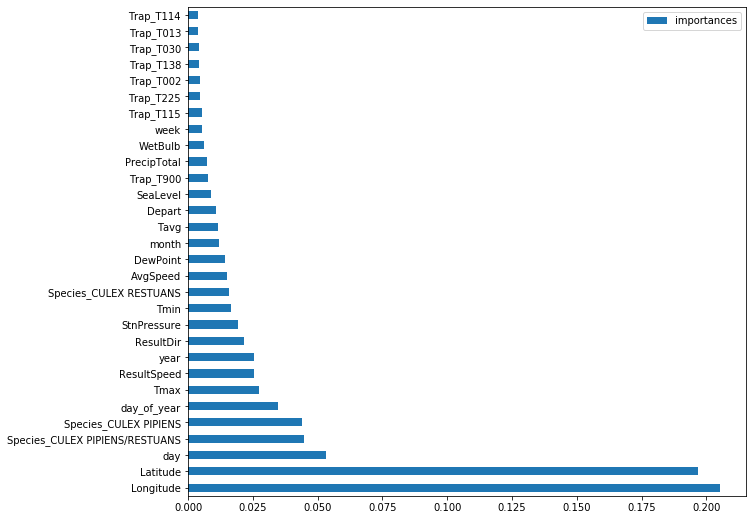

In [32]:
# visualise feature importances from the model

fi = pd.DataFrame({
    'features': X.columns,
    'importances': xg_log2.feature_importances_})
fig = fi.sort_values(by='importances', ascending=False).iloc[:30]
fig.plot(kind='barh', figsize=(10,9))
plt.yticks(range(len(fig)),fig['features'])
plt.show()

In [33]:
print("Train Score:", xg_log2.score(X_train, y_train))
print("Test Score:", xg_log2.score(X_test, y_test))
print('\n')
print("AUC/ROC test:", roc_auc_score(y_test,y_pred['1']))

Train Score: 0.966789667896679
Test Score: 0.9469160006032272


AUC/ROC test: 0.9805919772403361


In [34]:
#Confusion Matrix

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

#Confusion Matrix metrics

accuracy = (tp+tn)/(tp+fp+fn+tn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

print('\n')

print('Accuracy:',round(accuracy,3))
print('Sensitivity:',round(sensitivity,3))
print('Specificity:',round(specificity,3))
print('Precision:',round(precision,3))

True Negatives: 2963
False Positives: 331
False Negatives: 21
True Positives: 3316


Accuracy: 0.947
Sensitivity: 0.994
Specificity: 0.9
Precision: 0.909


### XGBoost (Featured Engineering)

In [35]:
df = pd.read_csv('../csv_files/model_train_featuredata.csv')
test = pd.read_csv('../csv_files/model_test_featuredata.csv')

In [36]:
#Selecting Features

X = df.drop(['Date','WnvPresent'], axis = 1)
y = df['WnvPresent']

In [37]:
#Train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=123)

In [38]:
# fit model no training data

xg_logf = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 20, n_estimators = 100, subsample = 0.8)

In [48]:
xg_logf.fit(X_train,y_train)

preds_proba = xg_logf.predict_proba(X_test)

pred = xg_logf.predict(X_test)

In [40]:
# predict y
y_pred = pd.DataFrame(xg_logf.predict_proba(X_test), columns=['0','1'])

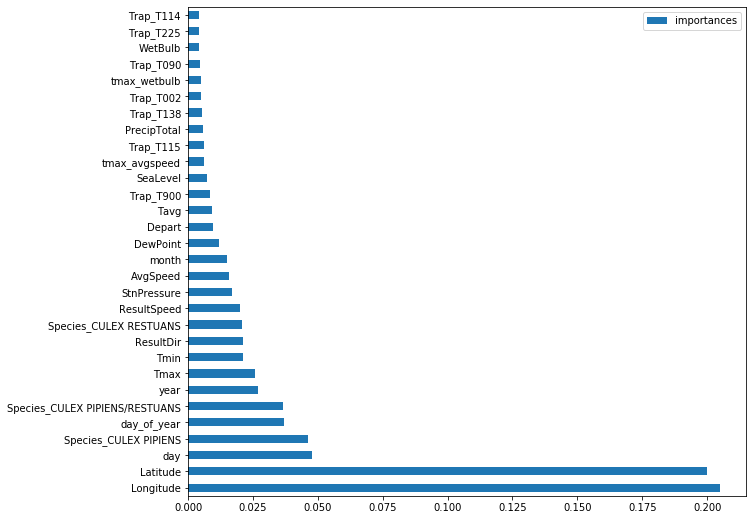

In [41]:
# visualise feature importances from the model

fi = pd.DataFrame({
    'features': X.columns,
    'importances': xg_logf.feature_importances_})
fig = fi.sort_values(by='importances', ascending=False).iloc[:30]
fig.plot(kind='barh', figsize=(10,9))
plt.yticks(range(len(fig)),fig['features'])
plt.show()

In [42]:
print("Train Score:", xg_logf.score(X_train, y_train))
print("Test Score:", xg_logf.score(X_test, y_test))
print('\n')
print("AUC/ROC test:", roc_auc_score(y_test,y_pred['1']))

Train Score: 0.9672415091497854
Test Score: 0.9464635801538229


AUC/ROC test: 0.9803778230103535


In [47]:
# Prediction against test data
features = list(X.columns)
test = test[features]

pred_test = pd.DataFrame(xg_logf.predict_proba(test), columns=['0','1']) 

In [49]:
#Confusion Matrix

tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

#Confusion Matrix metrics

accuracy = (tp+tn)/(tp+fp+fn+tn)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp/(tp+fp)

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

print('\n')

print('Accuracy:',round(accuracy,3))
print('Sensitivity:',round(sensitivity,3))
print('Specificity:',round(specificity,3))
print('Precision:',round(precision,3))

True Negatives: 2960
False Positives: 334
False Negatives: 21
True Positives: 3316


Accuracy: 0.946
Sensitivity: 0.994
Specificity: 0.899
Precision: 0.908


In [50]:
#Submission to Kaggle

submission = pd.DataFrame()
submission['WnvPresent'] = pred_test['1']
submission['Id'] = submission.index + 1
submission[['Id', 'WnvPresent']].to_csv('../csv_files/submission_with_XGBoost3.csv', index = False)

## Total score from individual submissions

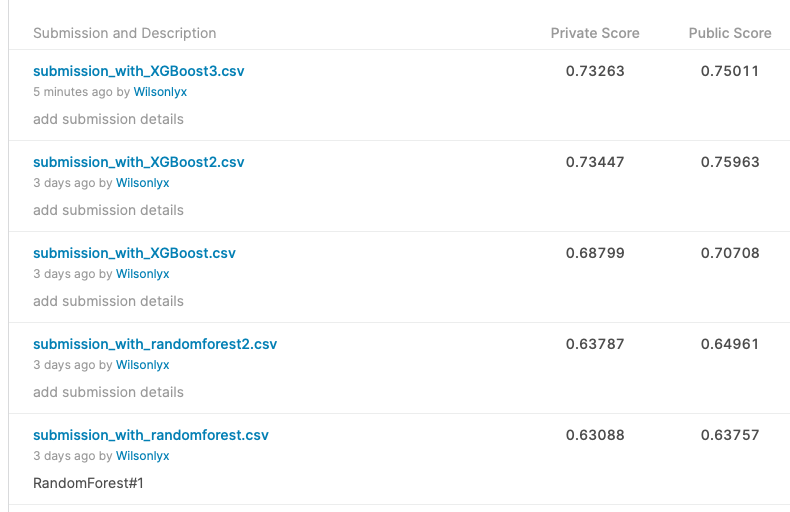

In [51]:
Image("../image/total_xg.png")